### Introduction :
Nous allons analyser ici la répartition des temps d'arrivés de coureurs lors du trail des allumés de Raismes en 2024. Il s'agit de la catégorie Senior Homme, lors d'une course de 9km et 136m de dénivelé.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.dates as mdates

In [129]:
url = 'https://www.le-sportif.com/ResultsDetail/ResultsHistoryDetail_List.aspx?EventResultsID=505&EventResultsActivityID=54640&EventResultsActivityRND=69d27b44-743a-4b94-8c90-91bb8eb93297&SRCHCATEG=SEH&SRCHSEX=M'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table')
rows = soup.find_all('tr')

data = []
for row in rows :
    cols = row.find_all('span')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

    df = pd.DataFrame(data)

In [130]:
df.head(20)

,0,1,2,3,4,5,6,7
0,Résultats,None,None,None,None,None,None,None
1,Course des Terrils,/ 2024,59 - Raismes - Nord - France,sept,None,None,None,None
2,épreuve,None,None,None,None,None,None,None
3,9 km - les Allumés,"Trail, Course nature",None,None,None,None,None,None
4,classement,None,None,None,None,None,None,None
5,Class.,Temps,Nom,Club,Dossard,Categ.,None,None
6,3,00:37:35,VANEENOO,Charles,METROPOLE TRAIL NATURE VILLENEUVE DASCQ,7444,SEH,M
7,5,00:38:39,BEN YAHIA,Karim,7403,SEH,M,None
8,6,00:39:51,DELEURY,Alexis,7151,SEH,M,None
9,8,00:41:05,JASKIEWICZ,Arthur,7104,SEH,M,None


In [106]:
df.tail(20)

,0,1,2,3,4,5,6,7
76,383,01:10:05,RICQUE,Maxence,7404,SEH,M,None
77,396,01:10:26,DE GEETER,Remi,7491,SEH,M,None
78,400,01:11:04,BENAYED,Samuel,7125,SEH,M,None
79,413,01:12:01,ROOTHAER,Xavier,7387,SEH,M,None
80,417,01:12:06,VALKENAERE,Julien,7142,SEH,M,None
81,432,01:12:49,CHAMBÉRY,Thomas,7527,SEH,M,None
82,451,01:14:10,DRUELLE,Antonin,7230,SEH,M,None
83,475,01:16:22,GELY,Corentin,7258,SEH,M,None
84,477,01:16:24,DOREAU,Alexandre,7213,SEH,M,None
85,478,01:16:34,BEN CHEIKH,Montassar,7300,SEH,M,None


In [131]:
# retrait des premières et dernières lignes inutiles
df.drop(df.index[0:5], inplace=True)
df.drop(df.index[86:], inplace=True)

# attribution des entêtes de colonnes, retrait de la 1ère ligne et actualisation de l'index permettant un classement dans le groupe de course
df.columns = df.iloc[0]
df = df[1:]
df.reset_index()

5,index,Class.,Temps,Nom,Club,Dossard,Categ.,None,None
0,6,3,00:37:35,VANEENOO,Charles,METROPOLE TRAIL NATURE VILLENEUVE DASCQ,7444,SEH,M
1,7,5,00:38:39,BEN YAHIA,Karim,7403,SEH,M,None
2,8,6,00:39:51,DELEURY,Alexis,7151,SEH,M,None
3,9,8,00:41:05,JASKIEWICZ,Arthur,7104,SEH,M,None
4,10,10,00:41:29,DEBEVER,Baptiste,7218,SEH,M,None
...,...,...,...,...,...,...,...,...,...
80,86,503,01:17:58,GAYDA,Pierre,7111,SEH,M,None
81,87,506,01:18:04,BERNARD,Thomas,7330,SEH,M,None
82,88,507,01:18:04,DUBEAUREPAIRE,Julien,7287,SEH,M,None
83,89,509,01:18:18,MANDIAU,Kevin,7420,SEH,M,None


In [132]:
df['Nom'] = df['Nom'].fillna('')
df['Club'] = df['Club'].fillna('')
df['Nom/Prenom'] = df[['Nom', 'Club']].agg(' '.join, axis=1)
df.drop(['Nom', 'Club'], axis=1 , inplace=True)

In [128]:
df.head()

5,Class.,Temps,Nom/Prenom,Dossard,Categ.,None,None,None,None
6,3,00:37:35,VANEENOO Charles,METROPOLE TRAIL NATURE VILLENEUVE DASCQ,7444,SEH,M,SEH,M
7,5,00:38:39,BEN YAHIA Karim,7403,SEH,M,None,M,None
8,6,00:39:51,DELEURY Alexis,7151,SEH,M,None,M,None
9,8,00:41:05,JASKIEWICZ Arthur,7104,SEH,M,None,M,None
10,10,00:41:29,DEBEVER Baptiste,7218,SEH,M,None,M,None


In [133]:
cols_to_move = df.columns[6]
df = df[[*df.columns[:2], cols_to_move, *df.columns[2:6]]]

In [134]:
df.rename(columns={'Class.': 'Classement', 'Categ.': 'Categorie'}, inplace=True)

In [135]:
df['Dossard'] = pd.to_numeric(df['Dossard'], errors='coerce')
df['Categorie'] = pd.to_numeric(df['Categorie'], errors='coerce')

In [136]:
df['Dossard'] = df['Dossard'].combine_first(df['Categorie'])
df.drop(columns=['Categorie',df.columns[0]], axis=1 , inplace=True)
df = df.iloc[:,:4]

In [137]:
df['Dossard'] = df['Dossard'].astype(int)

In [142]:
df.head()

5,Temps,Nom/Prenom,Dossard,None,Temps_min
6,00:37:35,VANEENOO Charles,7444,SEH,37
7,00:38:39,BEN YAHIA Karim,7403,M,38
8,00:39:51,DELEURY Alexis,7151,M,39
9,00:41:05,JASKIEWICZ Arthur,7104,M,41
10,00:41:29,DEBEVER Baptiste,7218,M,41


In [139]:
def convertir_en_minutes(temps_str):
    h, m, s = map(int, temps_str.split(':'))
    return h * 60 + m * 1

In [141]:
df['Temps_min'] = [convertir_en_minutes(t) for t in df['Temps']]

In [20]:
df.describe()

,Dossard,Temps_min
count,86.000000,86.000000
mean,7297.895349,57.372093
std,155.894461,11.931221
min,7031.000000,37.000000
25%,7156.250000,46.250000
50%,7286.500000,56.000000
75%,7416.000000,67.750000
max,7582.000000,80.000000


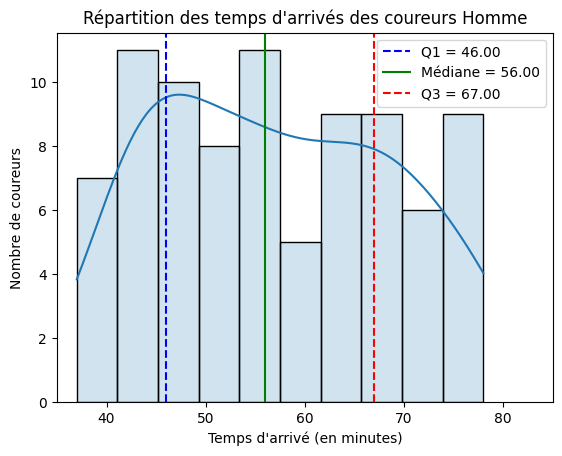

In [143]:
# Calcul des quartiles
q1 = df["Temps_min"].quantile(0.25)
q2 = df["Temps_min"].quantile(0.50)
q3 = df["Temps_min"].quantile(0.75)

ax = sns.histplot(df['Temps_min'], binwidth=4, kde=True, alpha=0.2)
plt.xlim(35,85)
plt.title("Répartition des temps d'arrivés des coureurs Homme")
plt.xlabel("Temps d'arrivé (en minutes)")
plt.ylabel("Nombre de coureurs")

ax.axvline(q1, color='blue', linestyle='--', label=f'Q1 = {q1:.2f}')
ax.axvline(q2, color='green', linestyle='-', label=f'Médiane = {q2:.2f}')
ax.axvline(q3, color='red', linestyle='--', label=f'Q3 = {q3:.2f}')


plt.legend()
plt.show()

Le graphique montre la répartition des temps d'arrivés des coureurs lors de la course. On observe une distribution bimodale qui semble indiquer 2 groupes (rapide et plus lents / confirmés vs amateurs?). La moyenne du temps de course est de 57 minutes avec 25% de coureurs arrivés en moins de 47 minutes et 75% arrivés en 68 minutes. On en déduit donc que 50% des coureurs sont arrivés en un laps de 19 minutes, ce qu iéquilibre la médiane.
Sachant qu'il y avait 86 inscrits, que le premier coureur est arrivé en 37 minutes et le dernier en 80 minutes.

In [ ]:
df['Groupe'] = df['Temps_min'].apply(
    lambda x: 'Rapide' if x < 60 else 'Lent'
)

In [167]:
df.groupby('Groupe')['Temps_min'].agg(['median', 'mean'])
quantiles = df.groupby('Groupe')['Temps_min'].quantile([0.25, 0.5, 0.75]).unstack()

In [168]:
print(quantiles)
print(f'')
print(df.groupby('Groupe')['Temps_min'].agg(['median', 'mean']))

        0.25  0.50   0.75
Groupe                   
Lent    64.0  68.0  72.00
Rapide  44.0  47.0  53.25

        median       mean
Groupe                   
Lent      68.0  68.675676
Rapide    47.0  48.187500


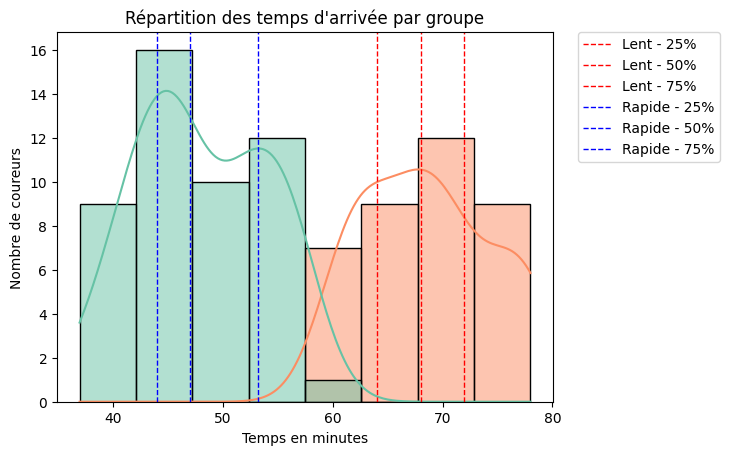

In [173]:
quantiles = df.groupby('Groupe')['Temps_min'].quantile([0.25, 0.5, 0.75]).unstack()

sns.histplot(data=df, x='Temps_min', hue='Groupe', kde=True, palette='Set2')
plt.title("Répartition des temps d'arrivée par groupe")
plt.xlabel('Temps en minutes')
plt.ylabel('Nombre de coureurs')

colors = {'Rapide': 'blue', 'Lent': 'red'}

for groupe in quantiles.index:
    for q, val in quantiles.loc[groupe].items():
        plt.axvline(x=val, color=colors[groupe], linestyle='--', linewidth=1,
                    label=f"{groupe} - {int(q*100)}%")

# 4. Supprimer les doublons de légende (car plusieurs lignes par groupe)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), borderaxespad=0, loc='upper left')


plt.show()

On voit ici que le groupe "rapide" est un peu asymétrique à droite, il y a donc 2 groupes puisque l'on a une distribution bimodale.
La distinction des 2 groupes se justifie car les 2 distributions ne se chevauchent quasiment pas. 